In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format='{:,.2f}'.format
data=pd.read_csv('data_zoopla_edinburgh.csv')
data.index.rename('property_index',inplace=True)
data.head()

,title,address,latitude,longitude,price,description,features,number_beds,number_baths,images,letting_agent_name,available_from
property_index,,,,,,,,,,,,
0,2 bed flat to rent,"Orchard Brae Avenue, Edinburgh EH4",NaN,NaN,£950 pcm,"Stunning double two bedroom, fully furnished a...","Furnished,Central Heating,Private Parking",2 beds,NaN,https://lid.zoocdn.com/u/480/360/de9ff26fa8a20...,Northwood Residential Lettings (Edinburgh),Available from 19 January 2022
1,1 bed flat to rent,"Drumdryan Street, 3F2, Edinburgh, City Of Edin...",NaN,NaN,"£1,100 pcm",Available now – furnished – no pets – no stude...,NaN,1 bed,1 bath,https://lid.zoocdn.com/u/480/360/a5a93c8c685e4...,"Clyde Property, Edinburgh",Available immediately
2,2 bed flat to rent,"Parkhead Loan, Saughton, Edinburgh EH11",NaN,NaN,£875 pcm,"Two bedroom property in Parkhead, Edinburgh, E...","Part furnished,Central Heating,No Smoking,No p...",2 beds,NaN,https://lid.zoocdn.com/u/480/360/335dc83f702c8...,Milards,Available from 17 December 2021
3,2 bed flat to rent,"Springfield, Edinburgh EH6",NaN,NaN,£900 pcm,"Property Reference: 1276989.,Bright modern, fu...","Furnished,No Agent Fees,Property Reference Num...",2 beds,1 bath,https://lid.zoocdn.com/u/480/360/24fbdf3eb834c...,OpenRent,Available from 08 January 2022
4,3 bed flat to rent,"Avon Road, Cramond, Edinburgh EH4",NaN,NaN,"£1,250 pcm",This spacious property is accessed via a well ...,"Furnished,Central Heating,Private Parking,Park...",3 beds,NaN,https://lid.zoocdn.com/u/480/360/e9a54640963c7...,Connell & McFadden,Available from 03 January 2022


In [26]:
#Cleaning columns 'price','number_beds' and 'number_baths' 
#and converting them to numeric values

data['price']=data['price'].str.replace('[£, pcmw]','')
data['number_beds']=data['number_beds'].str.replace('[beds ]','')
data['number_baths']=data['number_baths'].str.replace('[ baths]','')

data['price']=pd.to_numeric(data['price'])
data['number_beds']=pd.to_numeric(data['number_beds'])
data['number_baths']=pd.to_numeric(data['number_baths'])

C:\Users\usuario\AppData\Local\Temp/ipykernel_4436/938247417.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data['price']=data['price'].str.replace('[£, pcmw]','')
C:\Users\usuario\AppData\Local\Temp/ipykernel_4436/938247417.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data['number_beds']=data['number_beds'].str.replace('[beds ]','')
C:\Users\usuario\AppData\Local\Temp/ipykernel_4436/938247417.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  data['number_baths']=data['number_baths'].str.replace('[ baths]','')


In [27]:
#Cleaning columns 'available_from' 
#and converting it to datetime values

data['available_from']=data['available_from'].str.replace(r'(Available from )?','')
data['available_from']=pd.to_datetime(data['available_from'],errors='coerce')
data['available_from'].fillna(pd.to_datetime('today'),inplace=True)


C:\Users\usuario\AppData\Local\Temp/ipykernel_4436/864117803.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data['available_from']=data['available_from'].str.replace(r'(Available from )?','')


In [28]:
#Brief analysis about number of letting agents 
#and number of properties available to rent

number_of_agents=data['letting_agent_name'].value_counts().count()
number_of_properties=data['letting_agent_name'].value_counts().sum()
print('Number of agents: {}'.format(number_of_agents))
print('Number of properties: {}'.format(number_of_properties))

Number of agents: 85
Number of properties: 446


In [29]:
#Market share in % for the 10 biggest agencies

market_share=data['letting_agent_name'].value_counts().head(10)/data['letting_agent_name'].value_counts().sum()
market_share=market_share.rename('Market share by agency. First 10 agencies')
market_share

DJ Alexander Lettings Ltd                    0.15
Homelike Internet GmbH                       0.08
Southside Property Management                0.08
Murray & Currie Property                     0.05
Houst Lets                                   0.04
Ben Property Management Ltd                  0.04
Rooks Estate Agents & Lettings               0.03
OpenRent                                     0.03
Northwood Residential Lettings (Edinburgh)   0.03
Gilson Gray LLP                              0.03
Name: Market share by agency. First 10 agencies, dtype: float64

In [30]:
#Splitting images urls. This need more processing
data['images']=data['images'].str.split(',')
data['images']

property_index
0      [https://lid.zoocdn.com/u/480/360/de9ff26fa8a2...
1      [https://lid.zoocdn.com/u/480/360/a5a93c8c685e...
2      [https://lid.zoocdn.com/u/480/360/335dc83f702c...
3      [https://lid.zoocdn.com/u/480/360/24fbdf3eb834...
4      [https://lid.zoocdn.com/u/480/360/e9a54640963c...
                             ...                        
441    [https://lid.zoocdn.com/u/480/360/93ef38af110c...
442    [https://lid.zoocdn.com/u/480/360/4fcaeee76637...
443    [https://lid.zoocdn.com/u/480/360/61d1a88dc9e4...
444    [https://lid.zoocdn.com/u/480/360/5d5416bce32b...
445    [https://lid.zoocdn.com/u/480/360/df56751592e7...
Name: images, Length: 446, dtype: object

In [31]:
# Data available about coordinates
(data[['latitude','longitude']].dropna().shape)[0]/(data[['latitude','longitude']].shape)[0]

# Only 25% of the properties have coordinates. Another API that produces better results
# must be evaluated

0.2533632286995516

<AxesSubplot:ylabel='Frequency'>

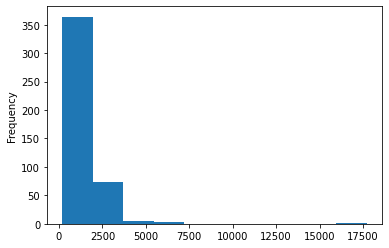

In [32]:
#First histogram of rent prices

data['price'].plot(kind='hist')

#Most of the properties have rents below 2500pcm

Text(0.5, 1.0, 'Distribution of rent (properties below 2500 pcm) [pcm]')

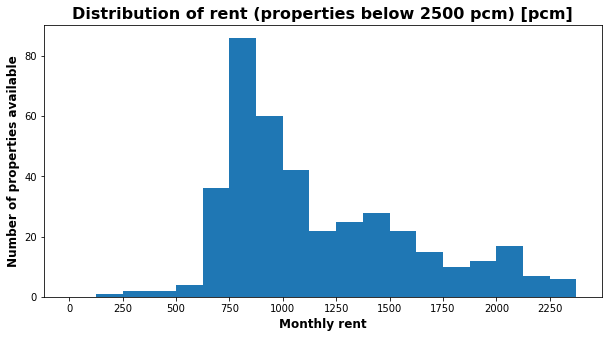

In [33]:
#Histogram with rents below 2500pcm

fig,ax=plt.subplots(figsize=(10,5))

data_less_2500=data[data['price']<=2500]

ax.hist(data_less_2500['price'],bins=np.arange(0,2500,125))
ax.set_xticks(np.arange(0,2500,250))
ax.set_xlabel('Monthly rent',fontsize=12,fontweight='heavy')
ax.set_ylabel('Number of properties available',fontsize=12,fontweight='heavy')
ax.set_title('Distribution of rent (properties below 2500 pcm) [pcm]',
fontsize=16,fontweight='heavy')

#There is a huge offer for properties from above 750pcm

C:\Users\usuario\AppData\Local\Temp/ipykernel_4436/1530548904.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data['waiting_period_days']=data['available_from'].apply(lambda x:(x-pd.datetime.now()).days)


Text(0.5, 1.0, 'Waiting time distribution [days]')

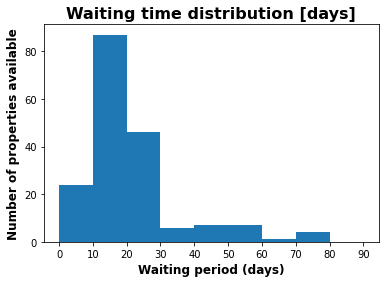

In [34]:
fig,ax=plt.subplots()

data['waiting_period_days']=data['available_from'].apply(lambda x:(x-pd.datetime.now()).days)

waiting_period_days_after_3_days=data[(data['waiting_period_days']<100) & (data['waiting_period_days']>3)]['waiting_period_days']
waiting_period_days_after_3_days
ax.hist(waiting_period_days_after_3_days.values,bins=np.arange(0,100,10))
ax.set_xticks(np.arange(0,100,10))
ax.set_xlabel('Waiting period (days)',fontsize=12,fontweight='heavy')
ax.set_ylabel('Number of properties available',fontsize=12,fontweight='heavy')
ax.set_title('Waiting time distribution [days]',fontsize=16,fontweight='heavy')


In [35]:
#Let's do the same analysis segmenting by different types of properties and prices

In [36]:
#Splitting the properties in four different segments accoirding to their price

data_500_1000=data[(data['price']>500) & (data['price']<=1000)]
data_1000_1500=data[(data['price']>1000) & (data['price']<=1500)]
data_1500_2000=data[(data['price']>1500)& (data['price']<=2000)]
data_2000_3000=data[(data['price']>2000)& (data['price']<=3000)]

Text(0.5, 0, 'Monthly rent [pcm]')

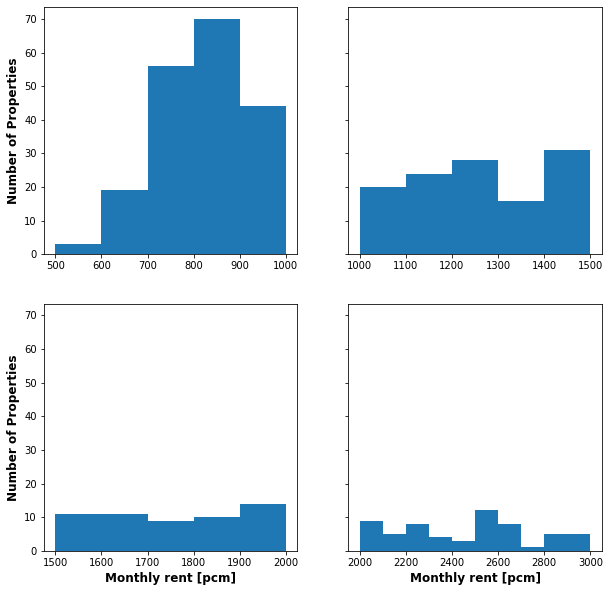

In [37]:
#Bar plots of price distribution segmented by prices

fig,ax=plt.subplots(2,2,figsize=(10,10),sharey=True)
ax[0,0].hist(data_500_1000['price'],bins=np.arange(500,1100,100))
ax[0,1].hist(data_1000_1500['price'],bins=np.arange(1000,1600,100))
ax[1,0].hist(data_1500_2000['price'],bins=np.arange(1500,2100,100))
ax[1,1].hist(data_2000_3000['price'],bins=np.arange(2000,3100,100))

ax[0,0].set_ylabel('Number of Properties',fontsize=12,fontweight='heavy')
ax[1,0].set_ylabel('Number of Properties',fontsize=12,fontweight='heavy')
ax[1,0].set_xlabel('Monthly rent [pcm]',fontsize=12,fontweight='heavy')
ax[1,1].set_xlabel('Monthly rent [pcm]',fontsize=12,fontweight='heavy')

# This seems just a confirmation of what the first price distribution showed.
# For the segment between 500 and 1000 pcm there is an increase of properties available with the price.
# For the rest of the segments the number of properties available is more less stable, 
# diminishing slowly as the price increases

Text(0.5, 0, 'Availability (2000-3000pcm) [days]')

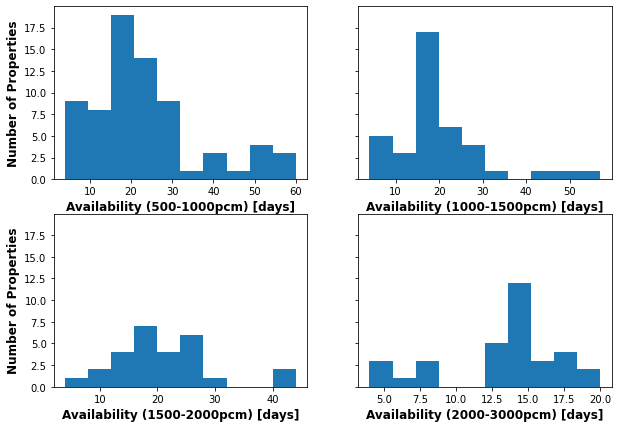

In [38]:
fig,ax=plt.subplots(2,2,figsize=(10,7),sharey=True)
ax[0,0].hist(data_500_1000[(data_500_1000['waiting_period_days']>3) & (data_500_1000['waiting_period_days']<70)]['waiting_period_days'])
ax[0,1].hist(data_1000_1500[(data_1000_1500['waiting_period_days']>3) & (data_1000_1500['waiting_period_days']<70)]['waiting_period_days'])
ax[1,0].hist(data_1500_2000[(data_1500_2000['waiting_period_days']>3) & (data_1500_2000['waiting_period_days']<70)]['waiting_period_days'])
ax[1,1].hist(data_2000_3000[(data_2000_3000['waiting_period_days']>3) & (data_2000_3000['waiting_period_days']<70)]['waiting_period_days'])

ax[0,0].set_ylabel('Number of Properties',fontsize=12,fontweight='heavy')
ax[1,0].set_ylabel('Number of Properties',fontsize=12,fontweight='heavy')

ax[0,0].set_xlabel('Availability (500-1000pcm) [days]',fontsize=12,fontweight='heavy')
ax[0,1].set_xlabel('Availability (1000-1500pcm) [days]',fontsize=12,fontweight='heavy')
ax[1,0].set_xlabel('Availability (1500-2000pcm) [days]',fontsize=12,fontweight='heavy')
ax[1,1].set_xlabel('Availability (2000-3000pcm) [days]',fontsize=12,fontweight='heavy')

#Seems that in most cases the properties are available to be taken in the first 30 days,
#except for the properties above 2000pcm. The waiting time is under 20 days for most of them

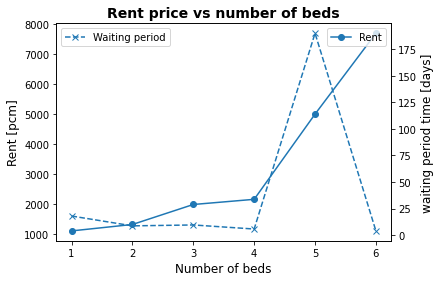

In [107]:
data_by_beds=data.groupby('number_beds')[['price','waiting_period_days']].agg({'price':['count','mean'],'waiting_period_days':'mean'})

fig,ax=plt.subplots()
ax.plot(data_by_beds.index,data_by_beds['price']['mean'],linestyle='-',marker='o',label='Rent')
ax.set_xlabel('Number of beds',fontsize=12)
ax.set_ylabel('Rent [pcm]',fontsize=12)
ax.set_title('Rent price vs number of beds',fontsize=14,fontweight='heavy')
ax.legend(loc=1)
ax2=ax.twinx()
ax2.plot(data_by_beds.index,data_by_beds['waiting_period_days']['mean'],linestyle='--',marker='x',label='Waiting period')
ax2.set_ylabel('waiting period time [days]',fontsize=12)
ax2.legend(loc=0)

In [87]:
data_by_beds

price          waiting_period_days
            count     mean                mean
number_beds                                   
1.00          180 1,113.96               18.02
2.00          180 1,328.19                8.76
3.00           55 1,993.16                9.60
4.00           18 2,165.22                5.78
5.00            1 5,000.00              190.00
6.00            4 7,691.25                4.00

Text(0.5, 1.0, 'Rent price vs number of beds')

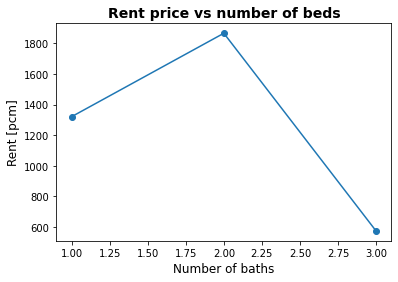

In [65]:
data_by_baths=data.groupby('number_baths')[['price','waiting_period_days']].agg({'price':['count','mean'],'waiting_period_days':'mean'})
fig,ax=plt.subplots()
ax.plot(data_by_baths.index,data_by_baths['price']['mean'],linestyle='-',marker='o')
ax.set_xlabel('Number of baths',fontsize=12)
ax.set_ylabel('Rent [pcm]',fontsize=12)
ax.set_title('Rent price vs number of beds',fontsize=14,fontweight='heavy')